In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generating Binary Border Masks as a Ground Truth to Train the First U-NET on

In [5]:
def mask_parse(mask):
    f = np.array([[1],[1/256],[1/(256*256)]])
    filtered = np.matmul(f, mask)  
    return filtered

def conv_mask_to_border(mask):
    kernel = np.ones((4, 4), np.uint8)
    img_erosion = cv2.erode(mask, kernel, iterations=1)
    img_dilation = cv2.dilate(mask, kernel, iterations=1)
    img_ne = np.not_equal(img_erosion, img_dilation).astype(np.uint8)
    img_out = img_ne * img_dilation
    return img_out


In [2]:
all_segs = os.listdir("data/seg")
# for seg in tqdm(all_segs):
#     path = "data/seg/"+seg
#     mask = cv2.imread(path, cv2.IMREAD_COLOR)
    
#     border = conv_mask_to_border(mask)
#     gray = cv2.cvtColor(border, cv2.COLOR_BGR2GRAY)
#     th, im_th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

#     cv2.imwrite("data/bin_true_membranes/"+seg, im_th)

In [79]:
seg = all_segs[-1]

In [88]:
path = "data/seg/ac3_daniel_s0001.png"
mask = cv2.imread(path, cv2.IMREAD_COLOR)

border = conv_mask_to_border(mask)
gray = cv2.cvtColor(border, cv2.COLOR_BGR2GRAY)
th, im_th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)


In [89]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
th_mask, im_th = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

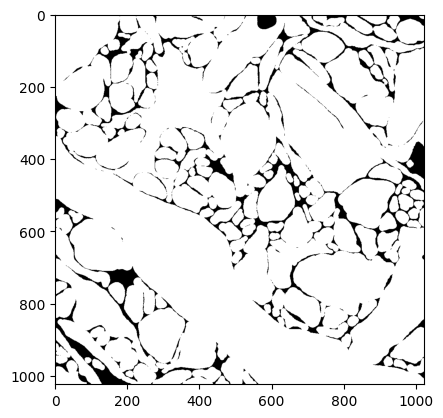

In [90]:
plt.imshow(im_th, cmap='gray')